## Exploratory Data Analysis (EDA)

- import dan load data

In [4]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
df = pd.read_csv('/content/ObesityDataSet.csv')

- tampilkan dataset

In [6]:
# Lihat 5 data teratas
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


- Informasi data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

- Dimensi data

In [8]:
df.shape

(2111, 17)

- Statistik deskriptif

In [9]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


- Visualisasi distribusi data

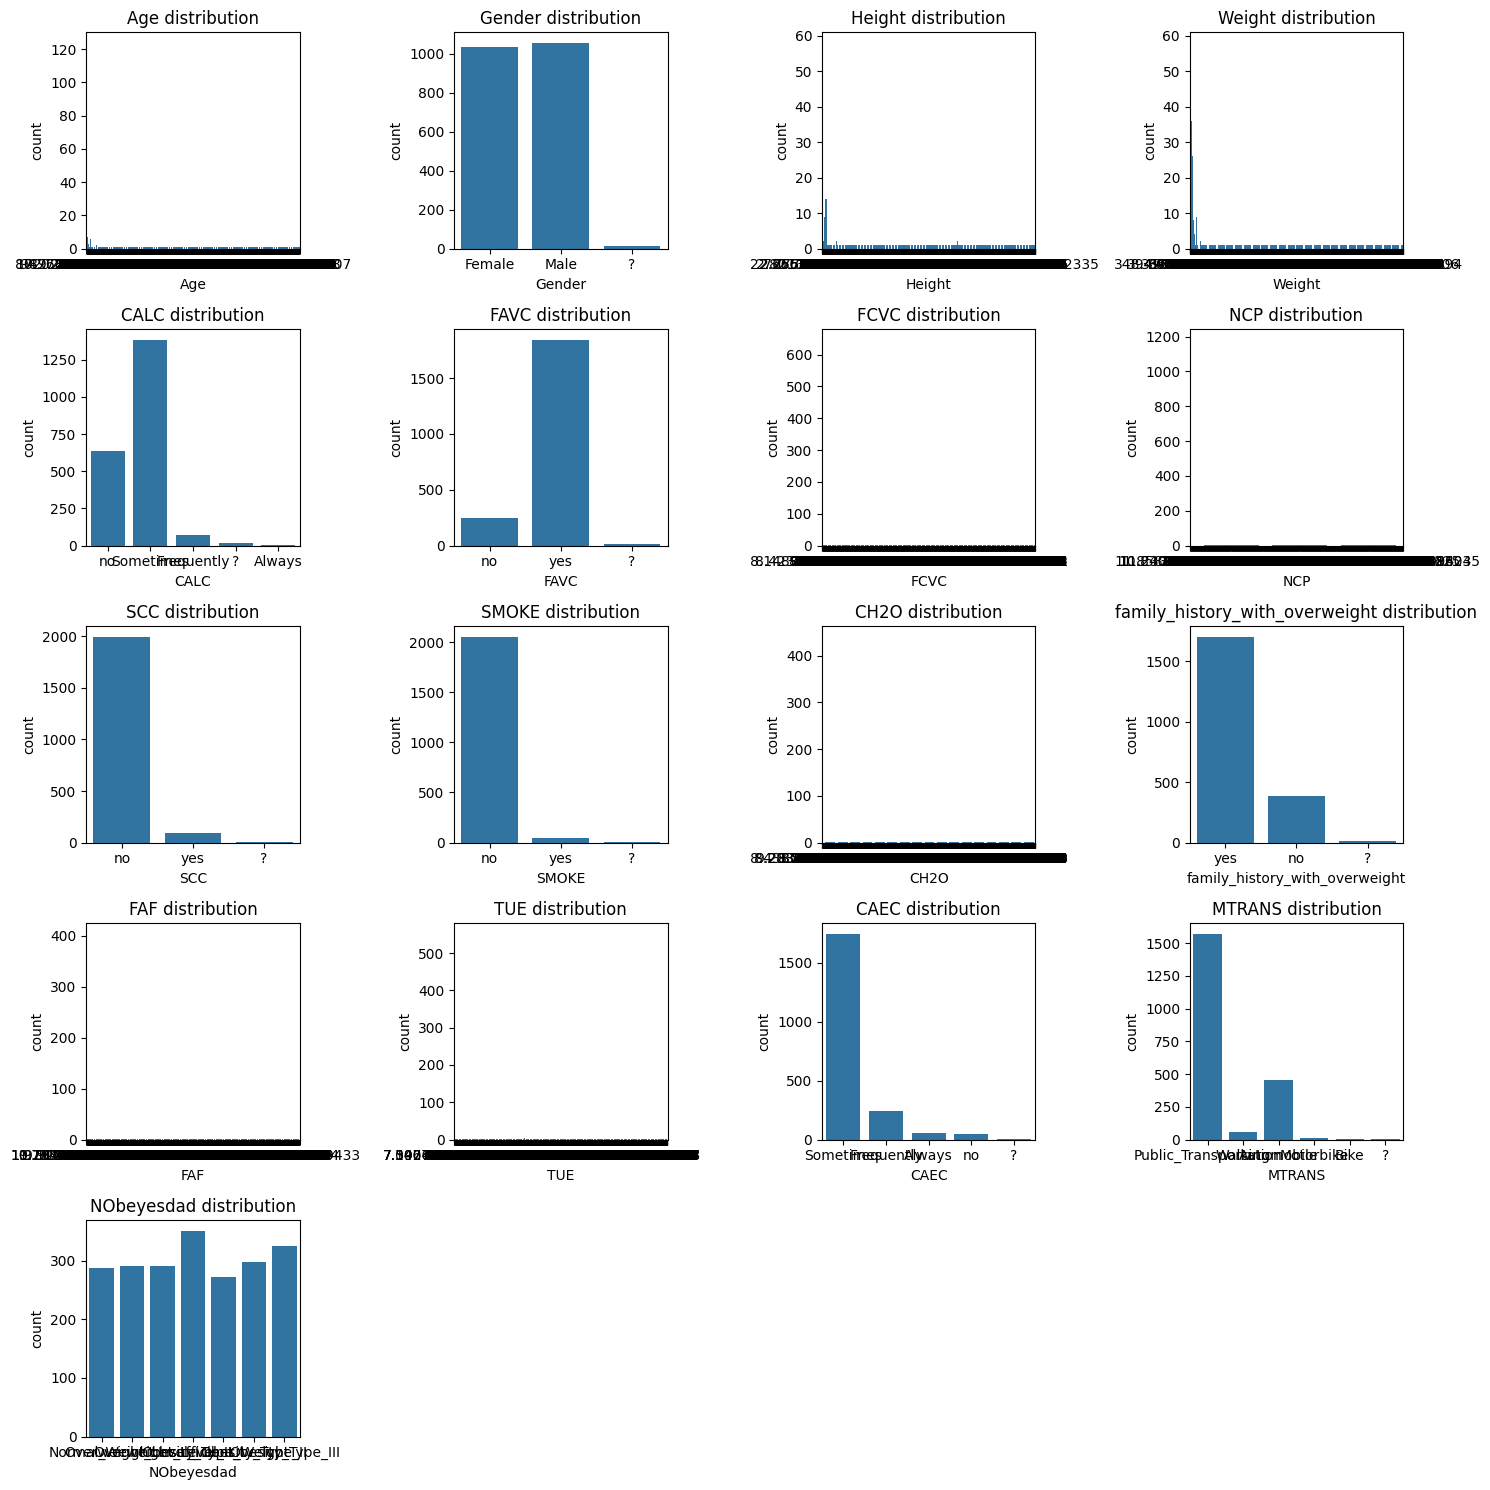

In [10]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} distribution')
    plt.tight_layout()

plt.show()

- cek missing value

In [11]:
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


- cek data Duplikat

In [12]:
df.duplicated().sum()

np.int64(18)

- Nilai Unik (persebaran value dalam fitur)

In [13]:
for col in df.columns:
  print(f'{col}')
  print(f'Jumlah nilai yang unik: {df[col].nunique()}')
  print(f'Nilai yang paling sering muncul (modus): {df[col].mode().values[0]}')
  print(f'{df[col].unique()}\n')

Age
Jumlah nilai yang unik: 1394
Nilai yang paling sering muncul (modus): 18
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Gender
Jumlah nilai yang unik: 3
Nilai yang paling sering muncul (modus): Male
['Female' 'Male' '?' nan]

Height
Jumlah nilai yang unik: 1562
Nilai yang paling sering muncul (modus): 1.7
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Weight
Jumlah nilai yang unik: 1518
Nilai yang paling sering muncul (modus): 80
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

CALC
Jumlah nilai yang unik: 5
Nilai yang paling sering muncul (modus): Sometimes
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

FAVC
Jumlah nilai yang unik: 3
Nilai yang paling sering muncul (modus): yes
['no' 'yes' '?' nan]

FCVC
Jumlah nilai yang unik: 808
Nilai yang paling sering muncul (modus): 3
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2

- Mengganti nilai '?' dengan NaN

In [14]:
df.replace('?', np.nan, inplace=True)

# Cek kembali missing values setelah mengganti '?'
print("Jumlah missing values setelah mengganti '?':")
print(df.isnull().sum())

Jumlah missing values setelah mengganti '?':
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


- menampilkan value dalam fitur NObeyesdad

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Obesity_Type_I'),
  Text(1, 0, 'Obesity_Type_III'),
  Text(2, 0, 'Obesity_Type_II'),
  Text(3, 0, 'Overweight_Level_I'),
  Text(4, 0, 'Overweight_Level_II'),
  Text(5, 0, 'Normal_Weight'),
  Text(6, 0, 'Insufficient_Weight')])

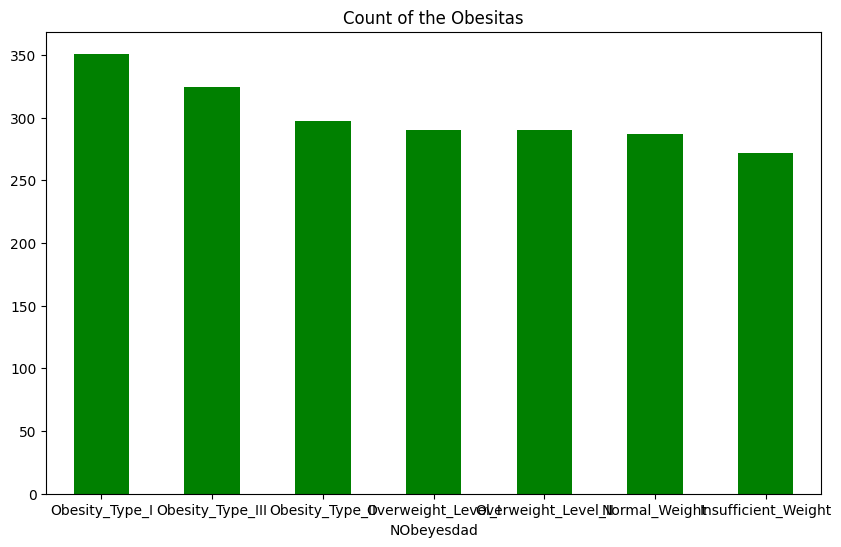

In [15]:
df['NObeyesdad'].value_counts().plot(kind='bar',figsize=(10,6),color=['green'])
plt.title("Count of the Obesitas")
plt.xticks(rotation=0)

- menampilkan outlier

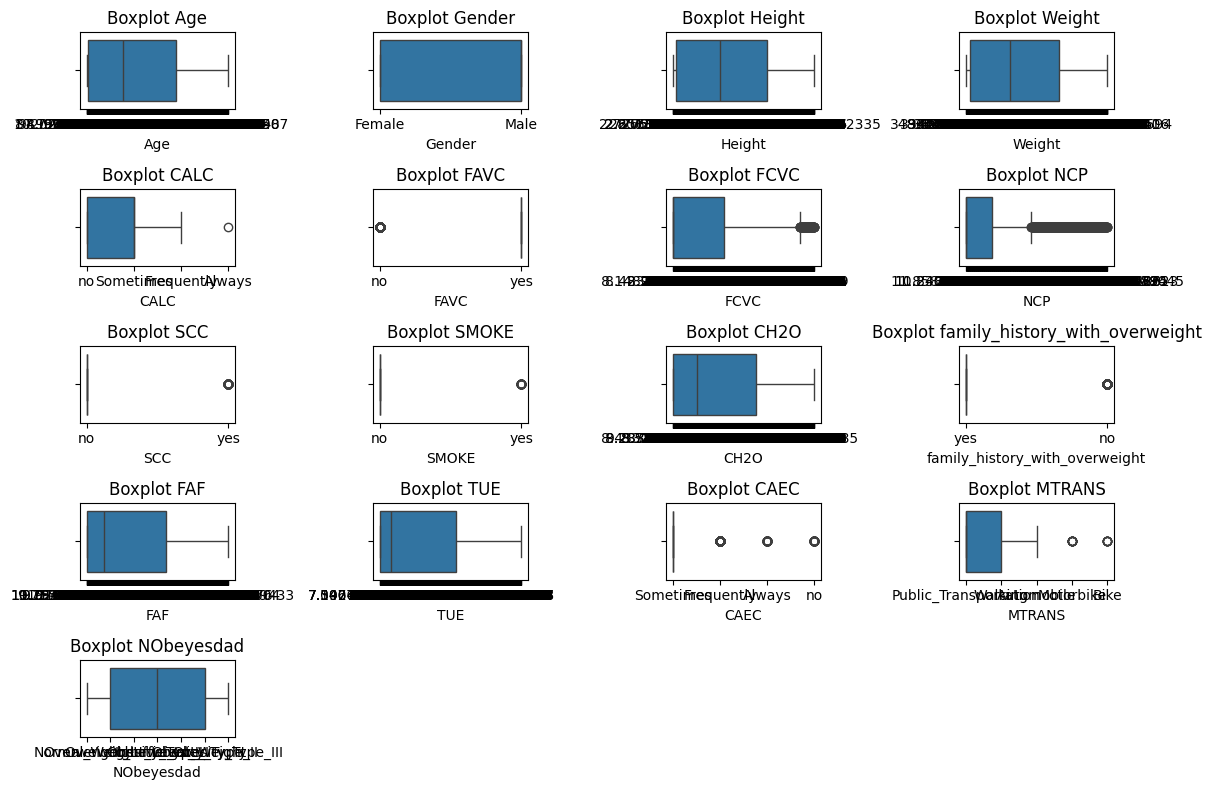

In [16]:
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

KESIMPULAN KATA KATA HARI INI

Beberapa value dalam fiturnya terdapat nilai '?' dan harus diubah menjadi 'nan' sehingga bisa dihandling missing value. pada bagian deteksi outlier terdapat beberapa fitur yang harus di handling dan tidak boleh di handling

## PREPROCESSING DATA

* Cek jumlah missing values

In [17]:
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


- mengubah tipe data yang terdeteksi salah dari object ke float

In [18]:
# Daftar kolom yang ingin dikonversi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi ke float64
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah ke float64, error jadi NaN jika ada

# Verifikasi tipe data
print(df[numeric_columns].dtypes)


Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

- memisahkan numerik dan kategorikal

In [20]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object' ]).columns

print (num_cols)
print (cat_cols)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


- mengatasi missing value dari data numerik menggunakan median

In [21]:
for col in num_cols:
  median_value = df[col].median()
  df[col].fillna(median_value, inplace=True)

<ipython-input-21-3099378769>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


* mengatasi missing value dari data kategorikal menggunakan modus

In [22]:
for col in cat_cols:
  mode_value = df[col].mode() [0]
  df[col]. fillna(mode_value, inplace=True)

<ipython-input-22-235317871>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col]. fillna(mode_value, inplace=True)


- cek kembali missing value

In [23]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


* Memeriksa keberadaan duplikat

In [24]:
df.duplicated().sum()
df[df.duplicated(keep=False)]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
145,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
282,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
295,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
443,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


- handling duplikat dengan drop

In [25]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df [df.duplicated() ]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad


- encoding (mengubah nilai kategori menjadi numerik)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for col in cat_cols:
  df[col] = LabelEncoder(). fit_transform(df[col])

- menampilkan outlier dengan boxplot

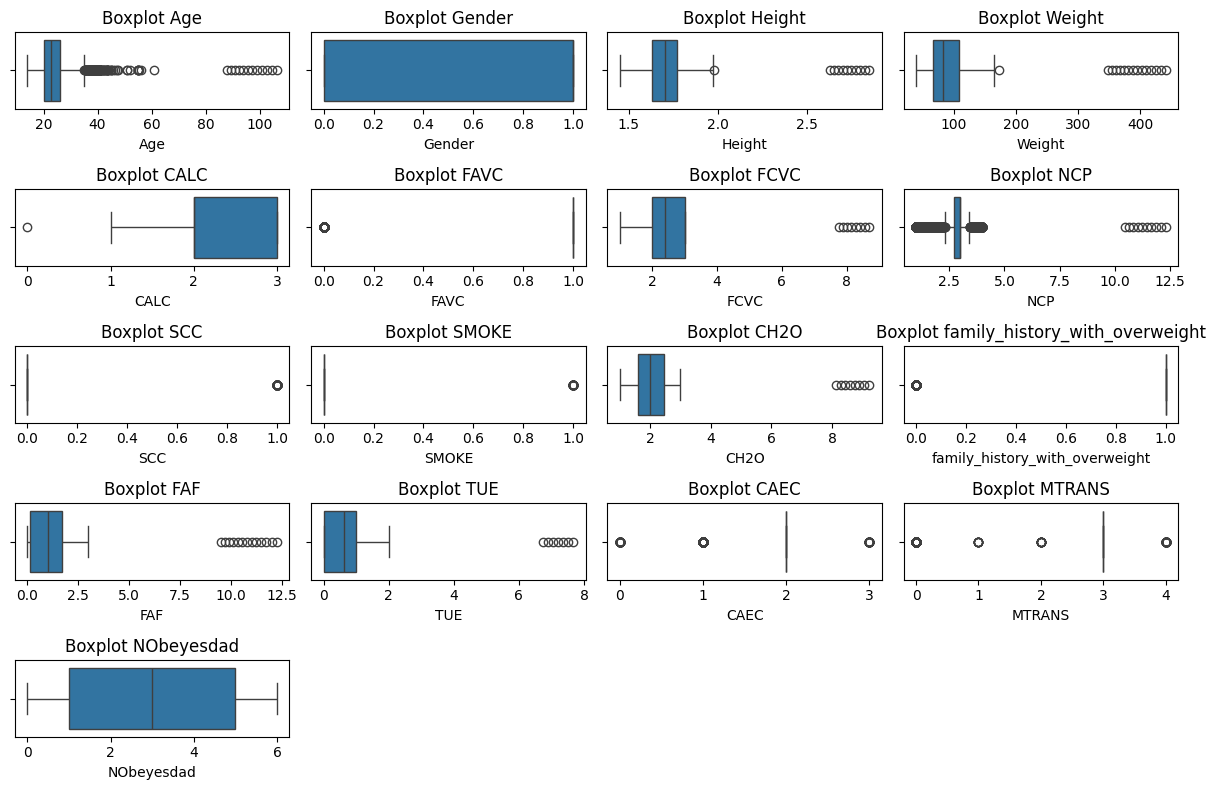

In [28]:
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

- menampilkan value dalam fitur NObeyesdad

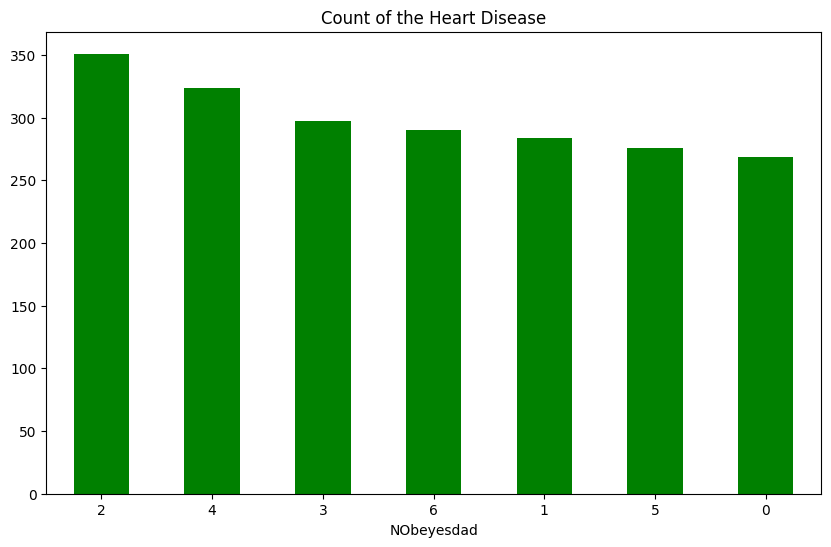

In [29]:
df['NObeyesdad'].value_counts().plot(kind='bar', figsize=(10,6), color=['green' ])
plt.title("Count of the Heart Disease")
plt.xticks(rotation=0);

- handling imbalanced menggunakan oversampling dari SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
y = df ['NObeyesdad' ]
X = df. drop(columns=['NObeyesdad' ])
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Sebelum SMOTE:", y.value_counts())
print("Setelah SMOTE:", pd. Series(y_resampled).value_counts())

Sebelum SMOTE: NObeyesdad
2    351
4    324
3    297
6    290
1    284
5    276
0    269
Name: count, dtype: int64
Setelah SMOTE: NObeyesdad
1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: count, dtype: int64


- visualisasi setelah di oversampling

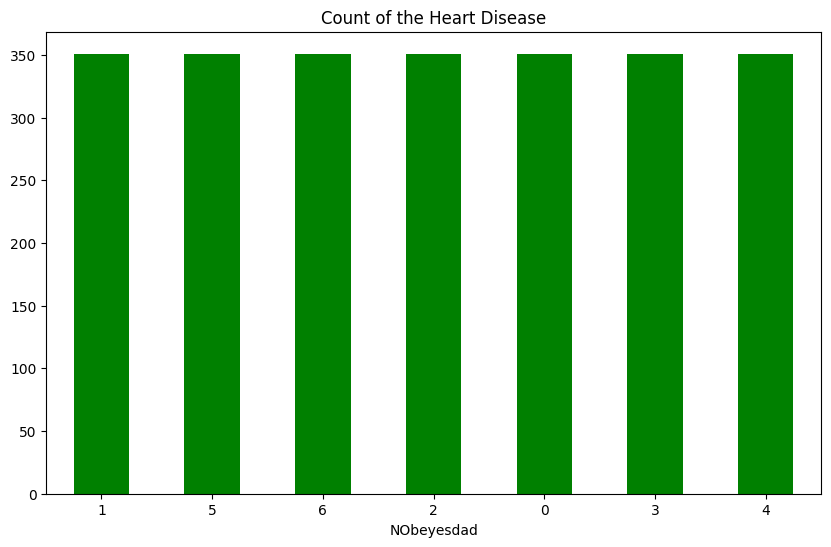

In [32]:
y_resampled.value_counts().plot(kind='bar', figsize=(10,6), color=['green' ])
plt.title("Count of the Heart Disease")
plt.xticks(rotation=0);

- menggabungkan kelas target yang sudah di handling ke dalam data frame

In [33]:
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
pd. Series(y_resampled, name='num') ], axis=1)

df = df_resampled

- splitting data

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Use the resampled data after SMOTE
X = df_resampled.drop(columns=['num']) # Drop the 'num' column which was the target after SMOTE
y = df_resampled['num']              # Use the 'num' column as the target label

# Split the data into training and testing sets
# Using a 90:10 split as indicated in the comments
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KESIMPULAN KATA KATA HARI INI

Pada proses ini handling outlier tidak dilakukan karena setelah di encoder dan dideteksi melalui IQR data terdeteksi outlier tapi sebenarnya itu bukan outlier melainkan memang data asli.

untuk feature, semua feature digunakan karena dataset obesitas termasuk ke dalam golongan kesehatan jadi mungkin semua feature digunakan karna mempengaruhi fitur lainnya

Saya menggunakan splitting 90/10 untuk 90 adalah data training dan 10 data test. kemudian saya menggunakan standarisasi StandardScaler. saya menggunakan over sampling dari SMOTE untuk balancing fitur target

## PEMODELAN DAN EVALUASI

- import library untuk pemodelan

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print("Akurasi:", accuracy_score(y_test, y_pred_nb))

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.52      0.63      0.57        35
           1       0.54      0.40      0.46        35
           2       0.50      0.43      0.46        35
           3       0.41      0.91      0.57        35
           4       0.89      0.97      0.93        35
           5       0.69      0.26      0.38        35
           6       0.42      0.22      0.29        36

    accuracy                           0.54       246
   macro avg       0.57      0.55      0.52       246
weighted avg       0.57      0.54      0.52       246

[[22  2  0  7  0  1  3]
 [10 14  1  0  1  2  7]
 [ 2  2 15 14  1  1  0]
 [ 0  2  0 32  1  0  0]
 [ 0  0  0  1 34  0  0]
 [ 4  5  5 10  1  9  1]
 [ 4  1  9 14  0  0  8]]
Akurasi: 0.5447154471544715


In [37]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print("Akurasi:", accuracy_score(y_test, y_pred_dt))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       0.88      0.80      0.84        35
           2       0.85      0.94      0.89        35
           3       0.97      0.94      0.96        35
           4       0.97      0.97      0.97        35
           5       0.83      0.86      0.85        35
           6       0.91      0.83      0.87        36

    accuracy                           0.91       246
   macro avg       0.91      0.91      0.91       246
weighted avg       0.91      0.91      0.91       246

[[35  0  0  0  0  0  0]
 [ 1 28  1  0  0  4  1]
 [ 0  1 33  0  1  0  0]
 [ 1  0  1 33  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  2  1  0  0 30  2]
 [ 0  1  3  0  0  2 30]]
Akurasi: 0.9065040650406504


In [38]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\n=== K-Nearest Neighbors ===")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print("Akurasi:", accuracy_score(y_test, y_pred_knn))


=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        35
           1       0.70      0.54      0.61        35
           2       0.71      0.83      0.76        35
           3       0.82      0.89      0.85        35
           4       0.87      0.94      0.90        35
           5       0.81      0.60      0.69        35
           6       0.75      0.58      0.66        36

    accuracy                           0.77       246
   macro avg       0.77      0.77      0.76       246
weighted avg       0.77      0.77      0.76       246

[[35  0  0  0  0  0  0]
 [ 7 19  2  1  1  0  5]
 [ 2  1 29  1  1  0  1]
 [ 0  1  2 31  1  0  0]
 [ 0  0  2  0 33  0  0]
 [ 2  3  3  3  2 21  1]
 [ 2  3  3  2  0  5 21]]
Akurasi: 0.7682926829268293


- perbandingan akurasi 3 model menggunakan chart

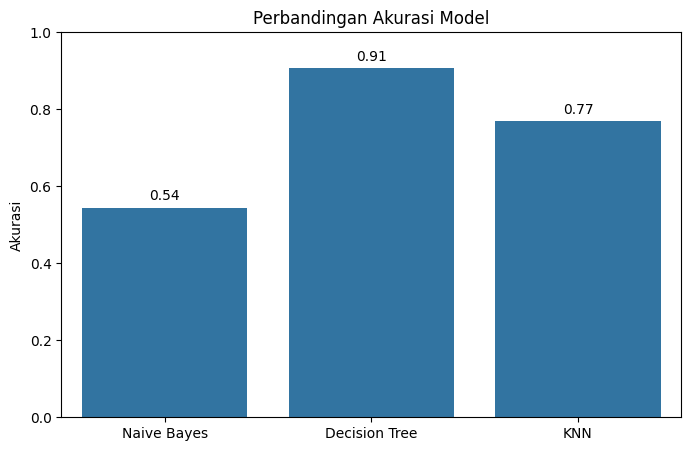

In [39]:
# Akurasi Chart
akurasis_before  = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'KNN': accuracy_score(y_test, y_pred_knn)
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(akurasis_before .keys()), y=list(akurasis_before .values()))
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, acc in enumerate(akurasis_before .values()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

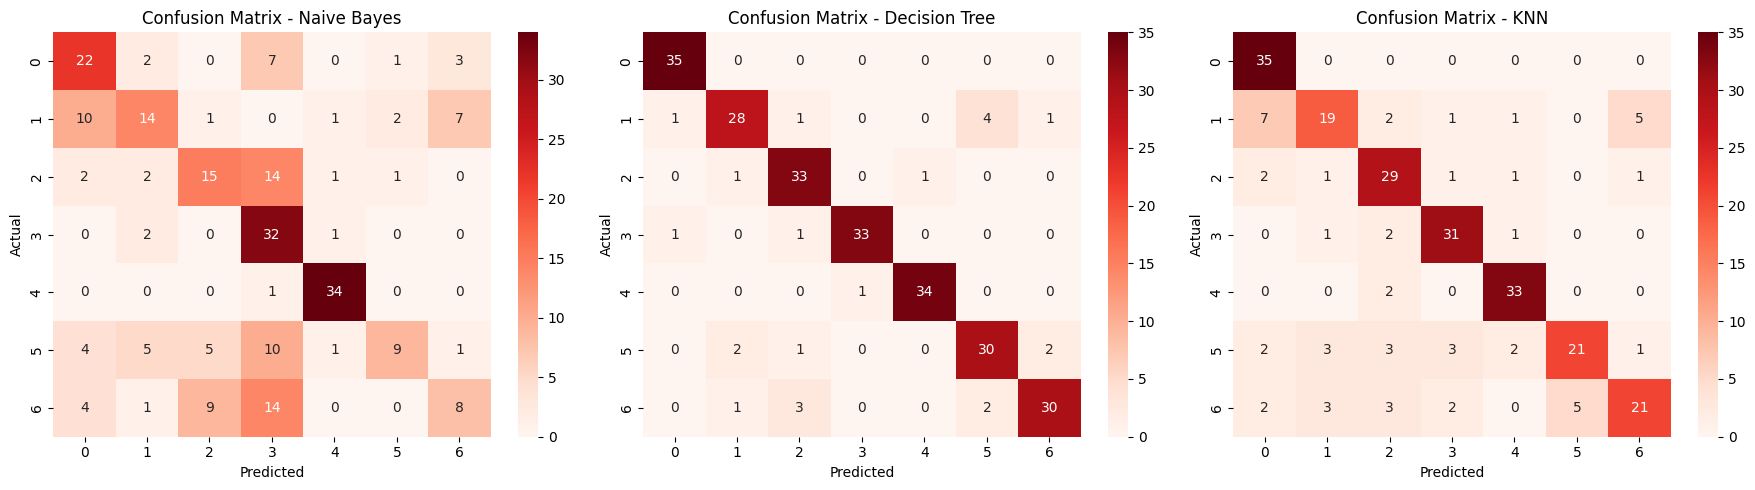

In [41]:
# Confusion Matrix
models = {
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

KESIMPULAN KATA KATA HARI INI

Dari dataset yang digunakan dan setelah di processing maka model yang cocok berdasarkan akurasi adalah decision tree lalu disusul dengan KNN dan Naive Bayes

Untuk evaluasi juga yang paling baik adalah Decision Tree berdasakan klasifikasi report

## HYPERPARAMETER TUNING


- import library

In [42]:
from sklearn.model_selection import GridSearchCV

- hyperparameter tuning untuk Naive Bayes

In [43]:
import numpy as np
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
nb_model = GaussianNB()
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train.values.ravel()) # Menggunakan .values.ravel() karena y_train adalah DataFrame
print("Best hyperparameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best cross-validation accuracy for Naive Bayes:", grid_search_nb.best_score_)
best_nb_model = grid_search_nb.best_estimator_
y_pred_nb_tuned = best_nb_model.predict(X_test)
print(classification_report(y_test, y_pred_nb_tuned))
print(confusion_matrix(y_test, y_pred_nb_tuned))
print("Akurasi:", accuracy_score(y_test, y_pred_nb_tuned))

Best hyperparameters for Naive Bayes: {'var_smoothing': np.float64(0.08111308307896872)}
Best cross-validation accuracy for Naive Bayes: 0.5318917704258297
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        35
           1       0.50      0.34      0.41        35
           2       0.49      0.54      0.51        35
           3       0.44      0.91      0.60        35
           4       0.92      0.97      0.94        35
           5       0.64      0.26      0.37        35
           6       0.40      0.22      0.29        36

    accuracy                           0.55       246
   macro avg       0.56      0.55      0.53       246
weighted avg       0.56      0.55      0.52       246

[[21  2  0  7  0  2  3]
 [10 12  1  0  1  3  8]
 [ 1  2 19 12  1  0  0]
 [ 0  2  1 32  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 4  5  7  8  1  9  1]
 [ 4  1 11 12  0  0  8]]
Akurasi: 0.5487804878048781


- hyperparameter tuning untuk Decision Tree

In [44]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train.values.ravel())
print("\nBest hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation accuracy for Decision Tree:", grid_search_dt.best_score_)
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt_tuned))
print(confusion_matrix(y_test, y_pred_dt_tuned))
print("Akurasi:", accuracy_score(y_test, y_pred_dt_tuned))


Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.9276293882720651
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       0.94      0.89      0.91        35
           2       0.89      0.94      0.92        35
           3       0.89      0.97      0.93        35
           4       0.97      0.97      0.97        35
           5       0.94      0.86      0.90        35
           6       0.82      0.78      0.80        36

    accuracy                           0.91       246
   macro avg       0.91      0.92      0.91       246
weighted avg       0.91      0.91      0.91       246

[[35  0  0  0  0  0  0]
 [ 1 31  0  0  0  1  2]
 [ 0  1 33  0  0  0  1]
 [ 0  0  0 34  1  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  1  0  1  0 30  3]
 [ 1  0  4  2  0  1 28]]
Akurasi: 0.9146341463414634


- hyperparameter tuning untuk KNN

In [45]:
import matplotlib.pyplot as plt
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train.values.ravel())
print("\nBest hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation accuracy for KNN:", grid_search_knn.best_score_)
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn_tuned))
print(confusion_matrix(y_test, y_pred_knn_tuned))
print("Akurasi:", accuracy_score(y_test, y_pred_knn_tuned))


Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.8733624097320817
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        35
           1       0.89      0.71      0.79        35
           2       0.92      0.94      0.93        35
           3       0.91      0.91      0.91        35
           4       0.90      1.00      0.95        35
           5       0.84      0.77      0.81        35
           6       0.77      0.75      0.76        36

    accuracy                           0.87       246
   macro avg       0.87      0.87      0.87       246
weighted avg       0.87      0.87      0.87       246

[[35  0  0  0  0  0  0]
 [ 3 25  0  1  0  1  5]
 [ 0  0 33  1  1  0  0]
 [ 0  0  0 32  2  1  0]
 [ 0  0  0  0 35  0  0]
 [ 1  1  2  0  1 27  3]
 [ 2  2  1  1  0  3 27]]
Akurasi: 0.8699186991869918


- Evaluasi model

In [46]:
# === Evaluasi Model ===
def evaluasi_model(nama_model, y_true, y_pred):
    print(f"\n=== {nama_model} ===")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluasi_model("Naive Bayes (Tuned)", y_test, y_pred_nb_tuned)
evaluasi_model("Decision Tree (Tuned)", y_test, y_pred_dt_tuned)
evaluasi_model("KNN (Tuned)", y_test, y_pred_knn_tuned)


=== Naive Bayes (Tuned) ===
Akurasi: 0.5487804878048781
Confusion Matrix:
 [[21  2  0  7  0  2  3]
 [10 12  1  0  1  3  8]
 [ 1  2 19 12  1  0  0]
 [ 0  2  1 32  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 4  5  7  8  1  9  1]
 [ 4  1 11 12  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.60      0.56        35
           1       0.50      0.34      0.41        35
           2       0.49      0.54      0.51        35
           3       0.44      0.91      0.60        35
           4       0.92      0.97      0.94        35
           5       0.64      0.26      0.37        35
           6       0.40      0.22      0.29        36

    accuracy                           0.55       246
   macro avg       0.56      0.55      0.53       246
weighted avg       0.56      0.55      0.52       246


=== Decision Tree (Tuned) ===
Akurasi: 0.9146341463414634
Confusion Matrix:
 [[35  0  0  0  0  0  0]
 [ 1 31  0  0  0  1  2]
 [ 0  1 

- perbandingan setelah di hyperparameter

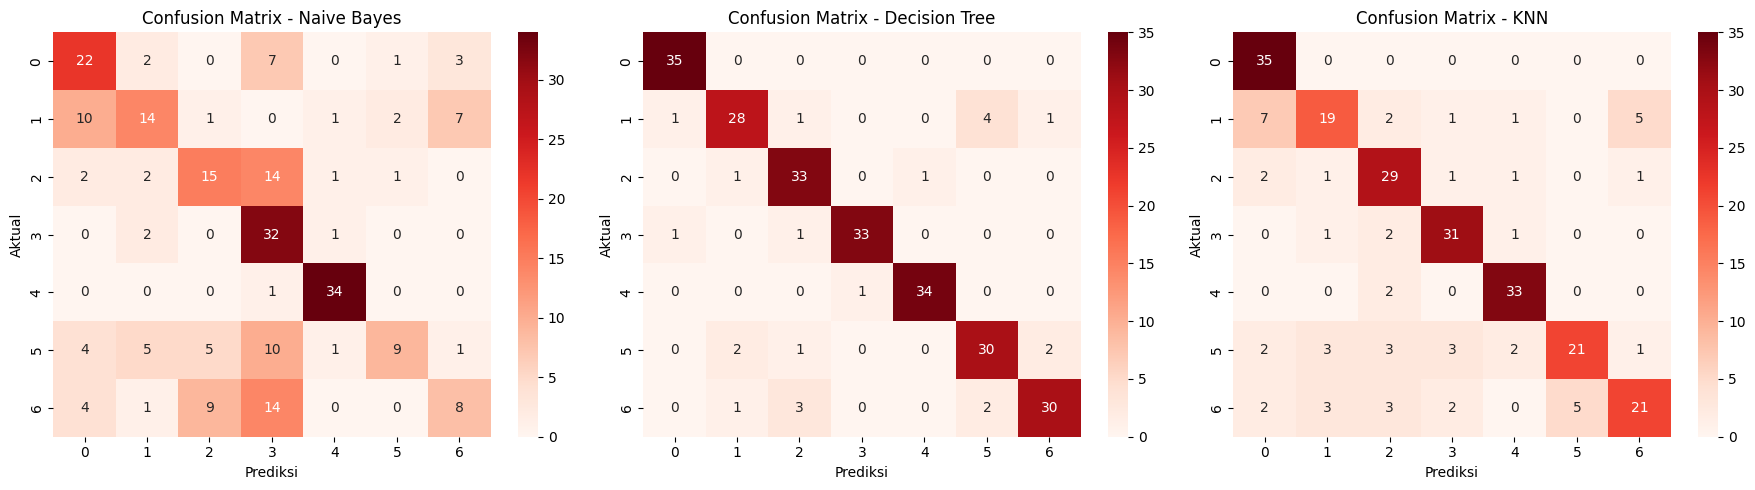

In [47]:
models = {
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model_name, predictions) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Prediksi')
    ax.set_ylabel('Aktual')

plt.tight_layout()
plt.show()


- Visualisasi Perbandingan Akurasi

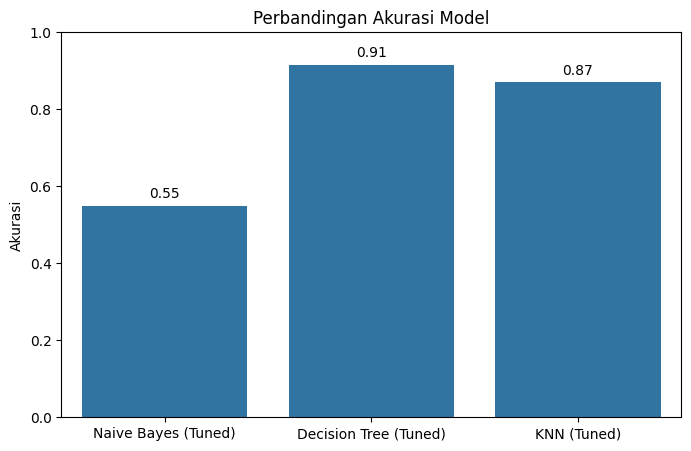

In [48]:

akurasi_after  = {
    'Naive Bayes (Tuned)': accuracy_score(y_test, y_pred_nb_tuned),
    'Decision Tree (Tuned)': accuracy_score(y_test, y_pred_dt_tuned),
    'KNN (Tuned)': accuracy_score(y_test, y_pred_knn_tuned)
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(akurasi_after .keys()), y=list(akurasi_after .values()))
plt.ylim(0, 1)
for i, acc in enumerate(akurasi_after .values()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.show()


- Visualisasi Gabungan

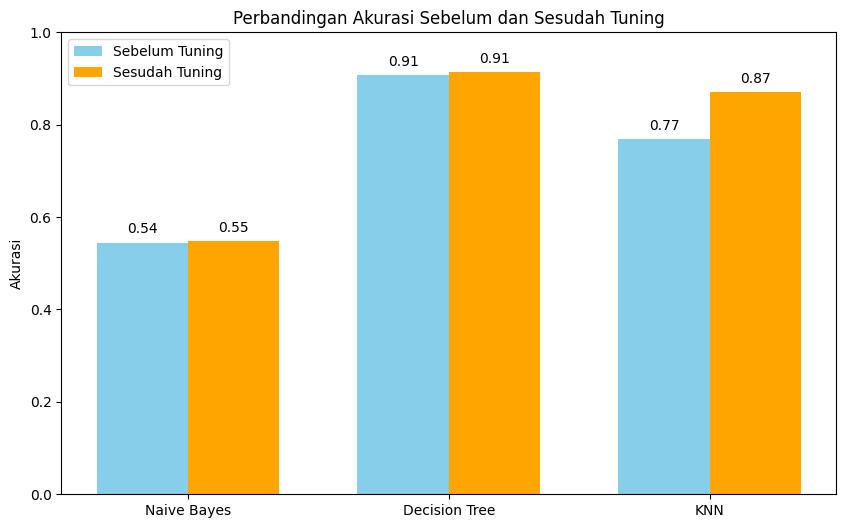

In [49]:
# Pastikan semua didefinisikan sebelum digunakan
akurasis_after  = {
    'Naive Bayes (Tuned)': accuracy_score(y_test, y_pred_nb_tuned),
    'Decision Tree (Tuned)': accuracy_score(y_test, y_pred_dt_tuned),
    'KNN (Tuned)': accuracy_score(y_test, y_pred_knn_tuned)
}

labels = list(akurasis_before.keys())
before_scores = list(akurasis_before.values())

# Gunakan akurasi_after yang baru saja didefinisikan
after_scores = list(akurasis_after.values())

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, before_scores, width=width, label='Sebelum Tuning', color='skyblue')
plt.bar([i + width for i in x], after_scores, width=width, label='Sesudah Tuning', color='orange')
plt.xticks([i + width / 2 for i in x], labels)
plt.ylim(0, 1)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Sebelum dan Sesudah Tuning')
plt.legend()

# Tambahkan label angka
for i in x:
    plt.text(i, before_scores[i] + 0.02, f"{before_scores[i]:.2f}", ha='center')
    plt.text(i + width, after_scores[i] + 0.02, f"{after_scores[i]:.2f}", ha='center')

plt.show()

KESIMPULAN KATA KATA HARI INI

setelah saya hyperparameter tuning terdapat hasil yang berbeda-beda tiap modelnya, untuk model Naive Bayes mengalami peningkatan sebanyak 0,01, kemudian Decision Tree tidak mengalami peningkatan atau penurunan, dan KNN mengalami peningkatan sebanyak 0,10.

KESIMPULAN SECARA KESELURUHAN

Dalam proyek ini, dilakukan pemrosesan data pada dataset obesitas dengan pendekatan yang mempertimbangkan karakteristik khusus dari data kesehatan. Tahap awal mencakup penanganan missing value dengan mengganti nilai '?' menjadi NaN, sehingga memungkinkan penanganan yang tepat terhadap data yang hilang. Untuk deteksi outlier, digunakan metode IQR, namun tidak semua data yang terdeteksi sebagai outlier dihapus atau diubah, karena sebagian merupakan data asli yang valid dan mencerminkan kondisi nyata pasien.

Seluruh fitur dalam dataset dipertahankan dan digunakan dalam pelatihan model, mengingat pentingnya setiap fitur dalam konteks kesehatan, di mana satu variabel dapat memengaruhi variabel lainnya. Data dibagi dengan rasio 90% untuk pelatihan dan 10% untuk pengujian. Selain itu, dilakukan standarisasi menggunakan StandardScaler serta oversampling menggunakan SMOTE untuk mengatasi ketidakseimbangan pada kelas target.

Dalam pemodelan, algoritma Decision Tree menunjukkan performa terbaik baik dari segi akurasi maupun evaluasi klasifikasi (classification report), disusul oleh K-Nearest Neighbors (KNN) dan Naive Bayes. Setelah dilakukan hyperparameter tuning, model KNN menunjukkan peningkatan performa paling signifikan sebesar 0,10, sementara Naive Bayes mengalami peningkatan kecil sebesar 0,01, dan Decision Tree tetap stabil tanpa perubahan performa.

Secara keseluruhan, pendekatan preprocessing yang selektif serta pemilihan model yang tepat berhasil menghasilkan sistem klasifikasi obesitas yang cukup andal dan sesuai untuk digunakan dalam konteks data kesehatan.